In [14]:
import pandas as pd #导入Pandas，用于数据读取和处理
# 读入房价数据，示例代码中的文件地址为internet链接，读者也可以下载该文件到本机进行读取
# 如，当数据集和代码文件位于相同本地目录，路径名应为"./house.csv"，或直接放"house.csv"亦可
df_housing = pd.read_csv("/Users/mollytsai/电子资源-零基础学机器学习/第1课 机器学习实战/教学用例1 加州房价预测/数据集/house.csv") 
df_housing.head #显示加州房价数据


<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

In [9]:
X = df_housing.drop("median_house_value",axis = 1) #构建特征集X
y = df_housing.median_house_value #构建标签集y
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [16]:
from sklearn.model_selection import train_test_split #导入数据集拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, 
         test_size=0.2, random_state=0) #以80%/20%的比例进行数据集的拆分

In [18]:
from sklearn.linear_model import LinearRegression #导入线性回归算法模型
model = LinearRegression() #使用线性回归算法
model.fit(X_train, y_train) #用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

In [24]:
y_pred = model.predict(X_test) #预测测试集的Y值
#print ('房价的真值(测试集)',y_test)
#print ('预测的房价(测试集)',y_pred)
y_test


3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64

In [25]:
y_test

3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64

In [23]:
y_pred

array([211157.06335417, 218581.64298575, 465317.31295563, ...,
       201751.23969631, 160873.51846958, 138847.26913352])

In [7]:
print("给预测评分：", model.score(X_test, y_test)) #评估预测结果

给预测评分： 0.6321014171579455


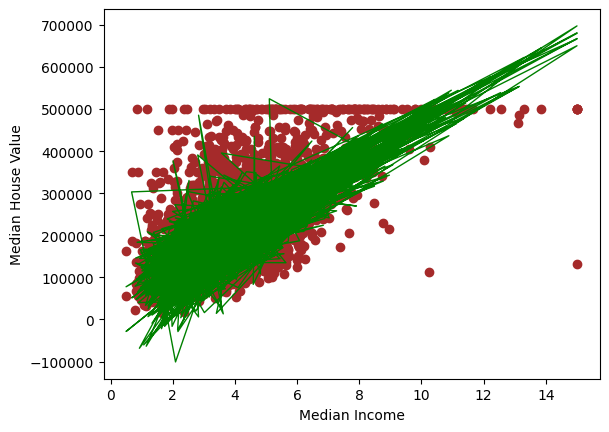

In [27]:
import matplotlib.pyplot as plt #导入matplotlib画图库
#用散点图显示家庭收入中位数和房价中位数的分布
plt.scatter(X_test.median_income, y_test,  color='brown')
#画出回归函数(从特征到预测标签)
plt.plot(X_test.median_income, y_pred, color='green', linewidth=1)
plt.xlabel('Median Income') #X轴-家庭收入中位数
plt.ylabel('Median House Value') #Y轴-房价中位数
plt.show() #显示房价分布和机器习得的函数图形